# Stellar cluster plot examples




In [35]:
# initialization
import numpy as np
import sys
import os
import matplotlib
import yt

# directory/file
datadir = os.path.expanduser(
    "~/test_data/haloD_varSFE_Lfid_Salp_ks20231024"
)  # data directory

step = 217
infofile = "output_%05d/info_%05d.txt" % (int(step), int(step))
infofile_fp = os.path.abspath(datadir + "/" + infofile)  # full path
logsfc = np.loadtxt(os.path.join(datadir, "logSFC"))

In [36]:
# read data
FIELDS = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
EPF = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]
print(infofile_fp)
# loading data
ds = yt.load(infofile_fp, fields=FIELDS, extra_particle_fields=EPF)
ad = ds.all_data()


yt : [INFO     ] 2024-02-12 17:07:01,567 Parameters: current_time              = 4.553642411873637
yt : [INFO     ] 2024-02-12 17:07:01,568 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-02-12 17:07:01,569 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-12 17:07:01,570 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-02-12 17:07:01,571 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-02-12 17:07:01,571 Parameters: current_redshift          = 13.699179151426021
yt : [INFO     ] 2024-02-12 17:07:01,572 Parameters: omega_lambda              = 0.685000002384186
yt : [INFO     ] 2024-02-12 17:07:01,572 Parameters: omega_matter              = 0.314999997615814
yt : [INFO     ] 2024-02-12 17:07:01,572 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-02-12 17:07:01,573 Parameters: hubble_constant           = 0.674000015258789


/home/fabg/test_data/haloD_varSFE_Lfid_Salp_ks20231024/output_00217/info_00217.txt


yt : [WARNING  ] 2024-02-12 17:07:03,253 This output has no cooling fields
yt : [WARNING  ] 2024-02-12 17:07:03,764 The DM particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,764 The star particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,765 The cloud particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,766 The dust particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,766 The star_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,766 The cloud_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,767 The dust_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2024-02-12 17:07:03,767 The gas_tracer particle filter already exists. Overriding.
yt : [INFO     ] 2024-02-12 17:07:03,768 Adding particle_type: DM
yt : [INFO     ] 2024-02-12 17:07:03,776 Adding particle_type: star
yt : [INFO  

In [69]:
ad["SFC","particle_position_x"]

YTFieldNotFound: Could not find field ('SFC', 'particle_position_x') in info_00217.
Did you mean:
	('DM', 'particle_position_x')
	('all', 'particle_position_x')
	('cloud', 'particle_position_x')
	('cloud_tracer', 'particle_position_x')
	('dust', 'particle_position_x')
	('dust_tracer', 'particle_position_x')
	('gas_tracer', 'particle_position_x')
	('io', 'particle_position_x')
	('nbody', 'particle_position_x')
	('sink', 'particle_position_x')
	('star', 'particle_position_x')
	('star_tracer', 'particle_position_x')

In [37]:
ad.keys()

dict_keys([])

In [38]:
centeroid = np.array([np.mean(ad["star", "particle_position_x"]), 
                      np.mean(ad["star", "particle_position_y"]), 
                      np.mean(ad["star", "particle_position_z"])])
print(centeroid)

[0.49101029 0.49262062 0.49530381]


yt : [INFO     ] 2024-02-12 17:12:10,533 xlim = 0.490967 0.491053
yt : [INFO     ] 2024-02-12 17:12:10,534 ylim = 0.492577 0.492664
yt : [INFO     ] 2024-02-12 17:12:10,537 xlim = 0.490967 0.491053
yt : [INFO     ] 2024-02-12 17:12:10,537 ylim = 0.492577 0.492664
yt : [INFO     ] 2024-02-12 17:12:10,539 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



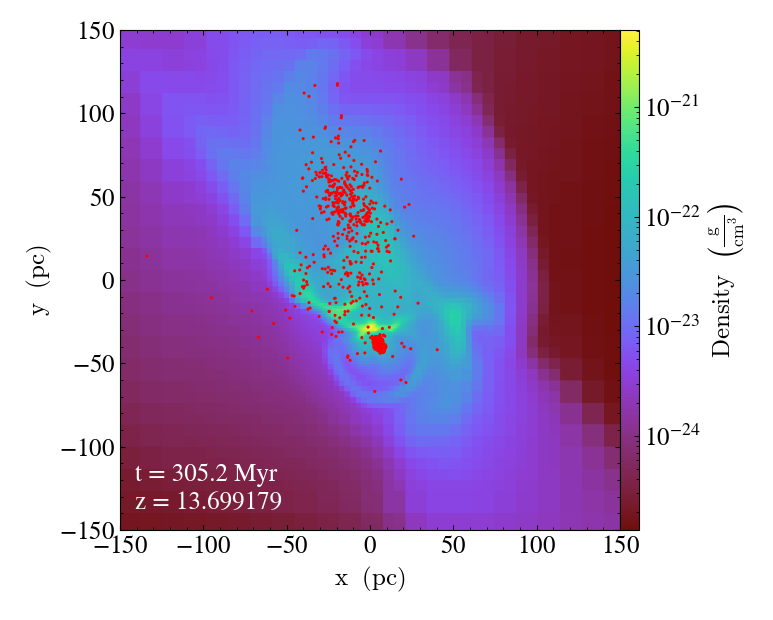

In [49]:
# plot
width = (300, "pc")  # plot width

p = yt.SlicePlot(ds, "z", "density", width=width, center=centeroid)
p.annotate_particles(
    width=width, ptype="star", p_size=20.0, marker=".", col="r"
)  # Pop II stars
# p.annotate_particles(
#     width=width, ptype="SFC", p_size=100.0, marker="x", col="b"
# )  # star forming clouds (test particles)
# p.annotate_particles(
#     width=width, ptype="PSC", p_size=100.0, marker="x", col="g"
# )  # passive stellar clusters (test particles)
p.annotate_timestamp(redshift=True, redshift_format='z = {redshift:.6f}')

p.set_figure_size(5)
p.show()

In [47]:
_, _, redshift, _, rsfc, msfc, nstar, mstar, nh, Zmetal, posx, poxy, posz = logsfc.T

In [52]:
print(redshift)

[21.87759 21.74784 21.71574 21.70353 21.69973 16.84611 16.76253 16.76025
 16.76005 16.75398 16.75368 16.74683 16.45536 16.44131 16.24241 16.23941
 16.19564 16.19564 14.15616 13.72564 13.72518 13.72411 13.65782 13.5795
 13.5269  13.52432 13.50889 13.50441 13.47057 13.46545 13.42777 13.18611
 13.10678 13.0956  12.85742 12.85503 12.84073 12.82681 12.82577 12.62062
 12.61858 12.60119 12.51477 12.43043 12.40401 12.38916 12.38903 12.38776
 12.38667 12.38584 12.38093 12.38017 12.37989 12.37932 12.37838 12.37772
 12.37491 12.37219 12.3691  12.36901 12.36783 12.36656 12.36617 12.36548
 12.36509 12.36452 12.36289 12.36077 12.36062 12.35896 12.35865 12.35175
 12.35036 12.3468  12.34508 12.34184 12.3297  12.32625 12.32582 12.32077
 12.3136  12.30887 12.29627 12.26847 12.26499 12.26176 12.25105 12.25052
 12.24911 12.24847 12.24835 12.24782 12.24682 12.2455  12.24477 12.2438
 12.24377 12.24371 12.2433  12.243   12.24281 12.24265 12.24258 12.24216
 12.24191 12.2417  12.24154 12.24135 12.24114 12.2410

In [50]:
new_cluster = np.argmin(np.abs(redshift - 13.699179))

In [51]:
redshift[new_cluster]

13.72411

In [55]:
print("mass of cloud [msun]",msfc[new_cluster])

mass of cloud [msun] 2976.0


In [56]:
print("mass of star cluster [msun]",mstar[new_cluster])

mass of star cluster [msun] 820.0


In [57]:
mstar[new_cluster]/msfc[new_cluster]

0.27553763440860213

In [58]:
print("density of cloud [cm ^ -3]", nh[new_cluster])

density of cloud [cm ^ -3] 17780.0


In [60]:
print("radius of cloud pc", rsfc[new_cluster])

radius of cloud pc 1.075
